<a href="https://colab.research.google.com/github/igor531205/Statistic/blob/main/statistic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

## Методы статистической обработки информации.
### Моделирование, оценка параметров и проверка гипотез согласия эмпирического распределения с теоретическим.

---


* Промоделировать выборку объема n = 150, имеющую биномиальное распределение β(n = 12, p = 0.8).

---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, skew, kurtosis, chisquare

*Произведем моделирование выборки, имеющую биномиальное распределение*

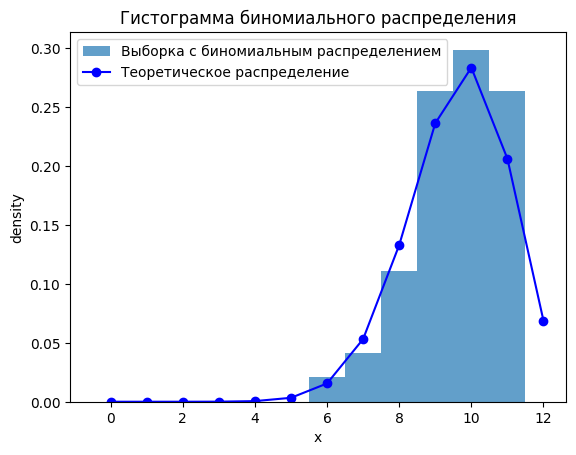

In [ ]:
# Объем выборки
s_binom = 150

# Параметры биномиального распределения
n_binom = 12
p_binom = 0.8

# Генерация выборки, имеющую биномиальное распределение
sample_binom = binom.rvs(n=n_binom, p=p_binom, size=s_binom)

# Генерация теоретического распределения
x = np.arange(0, n_binom+1)
theory_binom = binom.pmf(x, n_binom, p_binom)

# Построение гистограммы распределения
plt.hist(sample_binom, bins=x-0.5, density=True, alpha=0.7, label='Выборка с биномиальным распределением')
plt.plot(x, theory_binom, 'bo-', label='Теоретическое распределение')
plt.title('Гистограмма биномиального распределения')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

### *Вычисление основных статистик*

*Теоретическое среднее значение биномиального распределения E(X)=np*

In [ ]:
# Среднее значение для выборки
mean_practical = sample_binom.mean()

# Теоретическое среднее значение
mean_theoretical = n_binom * p_binom

print(f'Среднее значение для выборки:   {mean_practical:.5f}')
print(f'Теоретическое среднее значение: {mean_theoretical:.5f}')

Среднее значение для выборки:   9.66667
Теоретическое среднее значение: 9.60000


*Дисперсия для теоретического биномиального распределения Var(X)=np(1−p)*

In [ ]:
# Дисперсия для выборки
variance_practical = np.var(sample_binom)

# Теоретическая дисперсия
variance_theoretical = n_binom * p_binom * (1 - p_binom)

print(f'Дисперсия для выборки:   {variance_practical:.5f}')
print(f'Теоретическая дисперсия: {variance_theoretical:.5f}')

Дисперсия для выборки:   1.66222
Теоретическая дисперсия: 1.92000


*Cтандартное отклонение σ=sqrt(Var(X))*

In [ ]:
# Cтандартное отклонение для выборки
std_practical = np.std(sample_binom)

# Теоретическое стандартное отклонение
std_theoretical = np.sqrt(variance_theoretical)

print(f'Cтандартное отклонение для выборки:   {std_practical:.5f}')
print(f'Теоретическое стандартное отклонение: {std_theoretical:.5f}')

Cтандартное отклонение для выборки:   1.28927
Теоретическое стандартное отклонение: 1.38564


*Ошибка среднего SEM=σ/sqrt(N)*

In [ ]:
# Ошибка среднего для выборки
mean_err_practical = std_practical / np.sqrt(s_binom)

print(f'Ошибка среднего для выборки: {mean_err_practical:.5f}')

Ошибка среднего для выборки: 0.10527


*Медиана, минимум и максимум*

In [ ]:
# Медиана для выборки
median_practical = np.median(sample_binom)

# Минимум для выборки
min_theoretical = np.min(sample_binom)

# Максимум для выборки
max_theoretical = np.max(sample_binom)

print(f'Медиана для выборки:  {median_practical:.5f}')
print(f'Минимум для выборки:  {min_theoretical:.5f}')
print(f'Максимум для выборки: {max_theoretical:.5f}')

Медиана для выборки:  10.00000
Минимум для выборки:  6.00000
Максимум для выборки: 12.00000


*Квартили*

In [ ]:
# Квартили для выборки
quartiles_practical = np.percentile(sample_binom, [25, 50, 75])

# Межквартильный размах IQR=Q3−Q1
iqr_practical = quartiles_practical[2] - quartiles_practical[0]

print(f'Первый квартиль (Q1=25%): {quartiles_practical[0]:.5f}')
print(f'Второй квартиль (Q2=50%): {quartiles_practical[1]:.5f}')
print(f'Третий квартиль (Q3=75%): {quartiles_practical[2]:.5f}')
print(f'Межквартильный размах:   {iqr_practical:.5f}')

Первый квартиль (Q1=25%): 9.00000
Второй квартиль (Q2=50%): 10.00000
Третий квартиль (Q3=75%): 11.00000
Межквартильный размах:   2.00000


*Коэффициент асимметрии Skewness=(1-2p)/sqrt(Var(X))*

In [ ]:
# Коэффициент асимметрии для выборки
skewness_practical = skew(sample_binom)

# Теоретический коэффициент асимметрии
skewness_theoretical = (1 - 2 * p_binom) / np.sqrt(variance_theoretical)

print(f'Коэффициент асимметрии для выборки:   {skewness_practical:.5f}')
print(f'Теоретический коэффициент асимметрии: {skewness_theoretical:.5f}')

Коэффициент асимметрии для выборки:   -0.55718
Теоретический коэффициент асимметрии: -0.43301


Коэффициент асимметрии показывает, насколько симметрично распределены данные вокруг среднего значения. Оба значения указывают на небольшую отрицательную асимметрию, то есть распределение данных имеет небольшой перекос влево. Данные выборки более асимметричны.

*Коэффициент эксцесса Kurtosis=(1-6p(1-p))/Var(X)*

In [ ]:
# Коэффициент эксцесса для выборки
kurtosis_practical = kurtosis(sample_binom)

# Теоретический коэффициент эксцесса
kurtosis_theoretical = (1 - 6 * p_binom * (1 - p_binom)) / variance_theoretical

print(f'Коэффициент эксцесса для выборки:   {kurtosis_practical:.5f}')
print(f'Теоретический коэффициент эксцесса: {kurtosis_theoretical:.5f}')

Коэффициент эксцесса для выборки:   0.07665
Теоретический коэффициент эксцесса: 0.02083


Коэффициент эксцесса измеряет степень концентрации значений вокруг среднего значения распределения. Коэффициент эксцесса, близкий к нулю, указывает на то, что форма распределения близка к нормальному распределению. Небольшое различие в коэффициэнтах указывает на более острый пик выборки.

*Оценка параметров распределения по методу моментов p=E(X)/n и методу максимального правдоподобия*

In [ ]:
# Оценка параметров по методу моментов
estimation_practical = mean_practical / n_binom

print(f'Оценка параметров по методу моментов: {estimation_practical:.5f}')

Оценка параметров по методу моментов: 0.80556


Оценка получилась очень близка к теоретическому значению p=0,8. Оценка по методу моментов для биномиального распределения совпадает с оценкой по методу максимального правдоподобия.

*Проверить согласие эмпирического и теоретического распределения по критерию хи-квадрат Пирсона χ2=∑((Oi-Ei)2)/Ei*

In [ ]:
# Подсчет частот в выборке
frequencies_practical = np.bincount(sample_binom, minlength=n_binom + 1)

# Подсчет теоретических частот
frequencies_theoretical = theory_binom * s_binom

# Выполнение теста хи-квадрат
chi2_stat, p_value = chisquare(frequencies_practical, frequencies_theoretical)

chi2_stat, p_value
print(f'χ2:      {chi2_stat:.5f}')
print(f'p-value: {p_value:.5f}')

χ2:      5.65563
p-value: 0.93244


Статистика хи-квадрат составила 5.65563, а p-значение 0.93244. p-значение > 0.05 указывает на то, что различия между наблюдаемыми и ожидаемыми частотами в выборке можно объяснить случайной вариацией. Таким образом, мы не имеем оснований отвергать нулевую гипотезу, и можем утверждать, что выборка согласуется с теоретическим биномиальным распределением n=12 и p=0.8.